In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             roc_auc_score, 
                             roc_curve,
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             classification_report, 
                             confusion_matrix)
from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
chunk_size = 100000  # Adjust as needed
chunks = pd.read_csv('E:/Phat/data_electricity.csv', chunksize=chunk_size, low_memory=False, na_values='\\N')

df = pd.concat([chunk for chunk in chunks])

In [3]:
df.describe()

,id_chiso,id_bcs,hs_nhan,so_cto_chiso,ky,thang,nam,chiso_cu,chiso_moi,san_luong,sluong_ttiep,sluong_trphu,thd_le,sluong_1,sluong_2,sluong_3,ma_cto,so_cto_hso_cto,ma_cloai,so_pha,id_khang,id_ddo,kimua_cspk,csuat,so_cto_csuat_ddo,thang_csuat_ddo,gia_tri,fraud
count,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,22178305.0,2.217830e+07,22178305.0,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07,2.217830e+07
mean,2.634683e+09,2.656359e+07,1.793501e+01,1.262513e+09,1.015518e+00,1.190343e+01,2.019009e+03,1.820699e+04,1.880838e+04,1.711503e+03,0.0,9.700931e-01,0.0,2.276492e+03,2.717519e+03,2.836971e+03,4.445746e+16,1.262513e+09,6.306018e+02,2.208042e+00,3.765558e+06,5.755149e+06,1.106052e-01,7.897263e+01,1.262513e+09,7.275764e+00,2.894951e+00,1.266183e-02
std,1.170451e+06,1.131980e+06,9.860176e+01,3.484935e+09,1.236002e-01,1.026138e+00,9.328524e-02,3.297575e+04,3.369052e+04,5.348210e+03,0.0,5.426977e+01,0.0,6.743475e+03,7.720099e+03,7.239268e+03,1.199071e+17,3.484935e+09,6.926608e+01,9.781200e-01,7.879996e+05,1.090377e+06,3.136426e-01,3.954946e+02,3.484935e+09,3.423569e+00,7.661603e+00,1.118102e-01
min,2.631340e+09,1.112710e+05,1.000000e+00,2.708000e+03,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.041997e+11,2.708000e+03,3.040000e+02,1.000000e+00,3.464800e+06,5.306346e+06,0.000000e+00,0.000000e+00,2.708000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.633775e+09,2.597948e+07,1.000000e+00,1.419968e+07,1.000000e+00,1.200000e+01,2.019000e+03,2.046000e+03,2.241000e+03,1.300000e+02,0.0,0.000000e+00,0.0,1.800000e+02,2.130000e+02,2.380000e+02,6.362011e+14,1.419968e+07,5.820000e+02,1.000000e+00,3.512618e+06,5.358558e+06,0.000000e+00,0.000000e+00,1.419968e+07,5.000000e+00,0.000000e+00,0.000000e+00
50%,2.635100e+09,2.665369e+07,1.000000e+00,1.810354e+07,1.000000e+00,1.200000e+01,2.019000e+03,7.267000e+03,7.602000e+03,3.550000e+02,0.0,0.000000e+00,0.0,4.800000e+02,5.870000e+02,6.760000e+02,7.722009e+14,1.810354e+07,6.040000e+02,3.000000e+00,3.520897e+06,5.370035e+06,0.000000e+00,1.370000e+01,1.810354e+07,8.000000e+00,0.000000e+00,0.000000e+00
75%,2.635718e+09,2.746325e+07,1.000000e+00,1.612690e+09,1.000000e+00,1.200000e+01,2.019000e+03,1.948800e+04,2.009600e+04,1.230000e+03,0.0,0.000000e+00,0.0,1.851000e+03,2.178000e+03,2.490000e+03,5.802016e+16,1.612690e+09,6.420000e+02,3.000000e+00,3.555150e+06,5.414409e+06,0.000000e+00,3.300000e+01,1.612690e+09,1.000000e+01,0.000000e+00,0.000000e+00
max,2.636150e+09,2.868030e+07,8.000000e+03,1.812008e+10,2.000000e+00,1.200000e+01,2.020000e+03,5.219480e+05,5.356360e+05,2.331000e+05,0.0,7.800000e+03,0.0,3.239000e+05,3.239000e+05,5.117400e+05,6.392017e+17,1.812008e+10,8.050000e+02,3.000000e+00,6.508863e+06,9.151316e+06,1.000000e+00,1.000000e+04,1.812008e+10,1.200000e+01,3.890000e+02,1.000000e+00


In [4]:
print("No Frauds:", round((df['fraud'].value_counts()[0]/len(df)) *100,2), "%")
print("Frauds:", round((df['fraud'].value_counts()[1]/len(df)) *100,2), "%")

No Frauds: 98.73 %
Frauds: 1.27 %


In [5]:
missing_value_cols = ['ma_ttcto', 'so_cot', 'so_hop', 'ngay_hhluc_vitri_ddo', 
                      'ngay_hhluc_khang','ngay_hhluc_diemdo', 'ngay_hhluc']
for col in missing_value_cols:
    df[col].fillna("Missing", inplace=True)

In [6]:
numerical_cols = ['id_chiso','id_bcs','hs_nhan','so_cto_chiso','ky','thang','nam',
                  'chiso_cu','chiso_moi','san_luong','sluong_ttiep','sluong_trphu',
                   'thd_le','sluong_1','sluong_2','sluong_3','ma_cto','so_cto_hso_cto',
                    'ma_cloai','so_pha','id_khang','id_ddo','kimua_cspk','csuat','so_cto_csuat_ddo',
                     'thang_csuat_ddo','gia_tri' ]

scaler = StandardScaler()
for col in numerical_cols:
    df[col] = scaler.fit_transform(df[[col]])

In [7]:
cat_cols = ['ma_dviqly','ma_dvictren','ma_ddo','bcs_chiso','loai_chiso',
            'ma_ttcto','ngay_dky','ngay_cky','ngay_tao_chiso','nguoi_tao_chiso',
            'ngay_sua_chiso','nguoi_sua_chiso','ma_cnang_chiso','so_cot','so_hop',
            'ma_tram','ngay_hluc_vitri_ddo','ngay_hhluc_vitri_ddo','ngay_bdong',
            'ngay_kdinh','ma_bdong','dong_dien','dien_ap','vh_cong','ten_khang',
            'ma_khang','ngay_hluc_khang','ngay_hhluc_khang','dia_chi','ngay_hluc_diem_do',
            'ngay_hhluc_diemdo','loai_giatri','ngay_hluc','ngay_hhluc']

oe = OrdinalEncoder()
for col in cat_cols:
    df[col] = oe.fit_transform(df[[col]].astype(str)).astype(int)

### Split data in Train, Test and Validation

In [8]:
target = 'fraud'
X = df.drop(columns=[target])
y = df[target]


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Decision tree

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Tao custom metrix
def custom_metric(estimator, X, y_true):
    y_hat = estimator.predict_proba(X)[:, 1]
    min_tpr = 0.80
    max_fpr = abs(1 - min_tpr)
    
    v_gt = abs(y_true - 1)
    v_pred = np.array([1.0 - x for x in y_hat])
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)
    
    return partial_auc

# Tạo custom transformer để thực hiện oversampling và undersampling
class ResampleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, oversampler, undersampler):
        self.oversampler = oversampler
        self.undersampler = undersampler

    def fit(self, X, y):
        # Không cần fit gì ở đây, chỉ cần trả về chính X, y
        return self

    def transform(self, X, y=None):
        # Áp dụng oversampling rồi đến undersampling nếu y không phải None
        if y is not None:
            X_res, y_res = self.oversampler.fit_resample(X, y)
            X_res, y_res = self.undersampler.fit_resample(X_res, y_res)
            return X_res, y_res
        return X  # Nếu y là None, chỉ trả về X


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

SEED = 42

# Chuẩn bị dữ liệu
X = X_train
y = y_train

# Sử dụng StratifiedKFold để đảm bảo tỷ lệ lớp
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Khởi tạo mô hình Decision Tree
model = DecisionTreeClassifier(
    criterion='gini',        # Hoặc 'entropy'
    max_depth=6,             # Giới hạn độ sâu của cây
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=SEED
)

# Khởi tạo các phương pháp resampling
oversampler = RandomOverSampler(sampling_strategy=0.03, random_state=SEED)
undersampler = RandomUnderSampler(sampling_strategy=0.03, random_state=SEED)

# Tạo pipeline hoàn chỉnh sử dụng custom transformer
full_pipeline = Pipeline([
    ('resample', ResampleTransformer(oversampler, undersampler)),
    ('model', model)
])

# Đánh giá mô hình bằng cross-validation với custom transformer
print("Performing cross-validation with Augmentation...")
cross_val_results = cross_validate(
    full_pipeline,
    X,
    y,
    cv=skf,
    scoring=custom_metric,
    verbose=1
)

# In ra kết quả cross-validation
print(f'Cross-validation pAUC scores: {cross_val_results["test_score"]}')
print(f'Mean pAUC: {cross_val_results["test_score"].mean():.4f}, Std: {cross_val_results["test_score"].std():.4f}')

# Huấn luyện mô hình cuối cùng trên toàn bộ dữ liệu
print("Training final model on the entire combined dataset...")
full_pipeline.fit(X, y)


Performing cross-validation with Augmentation...
Cross-validation pAUC scores: [0.19356512 0.1934066  0.19357574 0.19322788 0.19290882]
Mean pAUC: 0.1933, Std: 0.0002
Training final model on the entire combined dataset...


Pipeline(steps=[('resample',
                 ResampleTransformer(oversampler=RandomOverSampler(random_state=42,
                                                                   sampling_strategy=0.03),
                                     undersampler=RandomUnderSampler(random_state=42,
                                                                     sampling_strategy=0.03))),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   4379497
           1       0.92      0.57      0.70     56164

    accuracy                           0.99   4435661
   macro avg       0.96      0.78      0.85   4435661
weighted avg       0.99      0.99      0.99   4435661



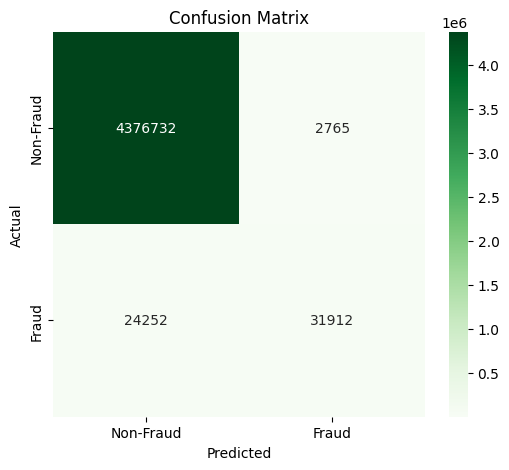

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dự đoán trên tập test
y_pred = full_pipeline.predict(X_test)

# Đánh giá mô hình với classification report và confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Định nghĩa độ đo tùy chỉnh (Partial AUC)
def custom_metric(y_true, y_pred_proba):
    min_tpr = 0.80  # Ngưỡng TPR tối thiểu
    max_fpr = abs(1 - min_tpr)  # Ngưỡng FPR tối đa
    
    v_gt = abs(y_true - 1)  # Chuyển đổi y_true thành lớp tích cực (1) và lớp tiêu cực (0)
    v_pred = np.array([1.0 - x for x in y_pred_proba])  # Chuyển đổi xác suất dự đoán thành lớp tiêu cực
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)  # Tính AUC của phần có FPR giới hạn
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)  # Điều chỉnh AUC

    return partial_auc

# Lấy xác suất dự đoán của lớp tích cực (Fraud)
y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]  # Dự đoán xác suất lớp tích cực (Fraud)

# Tính độ đo tùy chỉnh trên tập test
custom_auc_score = custom_metric(y_test, y_pred_proba)

# In kết quả độ đo tùy chỉnh
print(f'Custom pAUC Score: {custom_auc_score}')
print(f'AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

Custom pAUC Score: 0.1935630129052009
AUC Score: 0.9929176643280846


In [13]:
# Lấy xác suất dự đoán của lớp tích cực (Fraud)
y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]  # Dự đoán xác suất lớp tích cực (Fraud)
# In kết quả 
print(f'AUC Score: {roc_auc_score(y_test, y_pred_proba)}')


AUC Score: 0.9929176643280846


Text(0, 0.5, 'True Positive Rate')

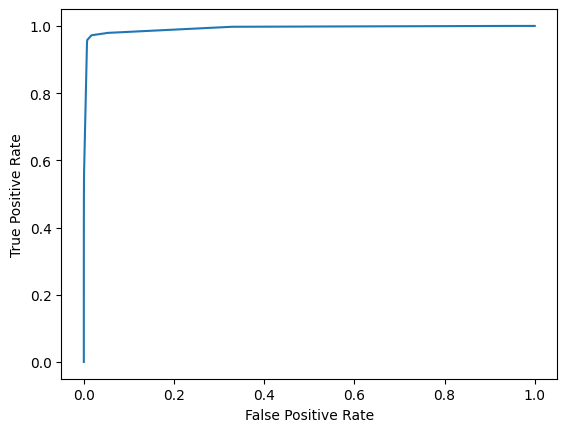

In [14]:
# Ve ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [15]:
Features = [col for col in df.columns if col != target]
print(Features)

['ma_dviqly', 'id_chiso', 'id_bcs', 'ma_dvictren', 'ma_ddo', 'bcs_chiso', 'hs_nhan', 'so_cto_chiso', 'ky', 'thang', 'nam', 'chiso_cu', 'chiso_moi', 'san_luong', 'sluong_ttiep', 'sluong_trphu', 'loai_chiso', 'thd_le', 'ma_ttcto', 'ngay_dky', 'ngay_cky', 'sluong_1', 'sluong_2', 'sluong_3', 'ngay_tao_chiso', 'nguoi_tao_chiso', 'ngay_sua_chiso', 'nguoi_sua_chiso', 'ma_cnang_chiso', 'so_cot', 'so_hop', 'ma_tram', 'ngay_hluc_vitri_ddo', 'ngay_hhluc_vitri_ddo', 'ma_cto', 'so_cto_hso_cto', 'ngay_bdong', 'ngay_kdinh', 'ma_bdong', 'dong_dien', 'dien_ap', 'vh_cong', 'ma_cloai', 'so_pha', 'id_khang', 'ten_khang', 'ma_khang', 'ngay_hluc_khang', 'ngay_hhluc_khang', 'dia_chi', 'ngay_hluc_diem_do', 'ngay_hhluc_diemdo', 'id_ddo', 'kimua_cspk', 'csuat', 'so_cto_csuat_ddo', 'thang_csuat_ddo', 'loai_giatri', 'gia_tri', 'ngay_hluc', 'ngay_hhluc']


C:\Users\HOME\AppData\Local\Temp\ipykernel_14036\514820566.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


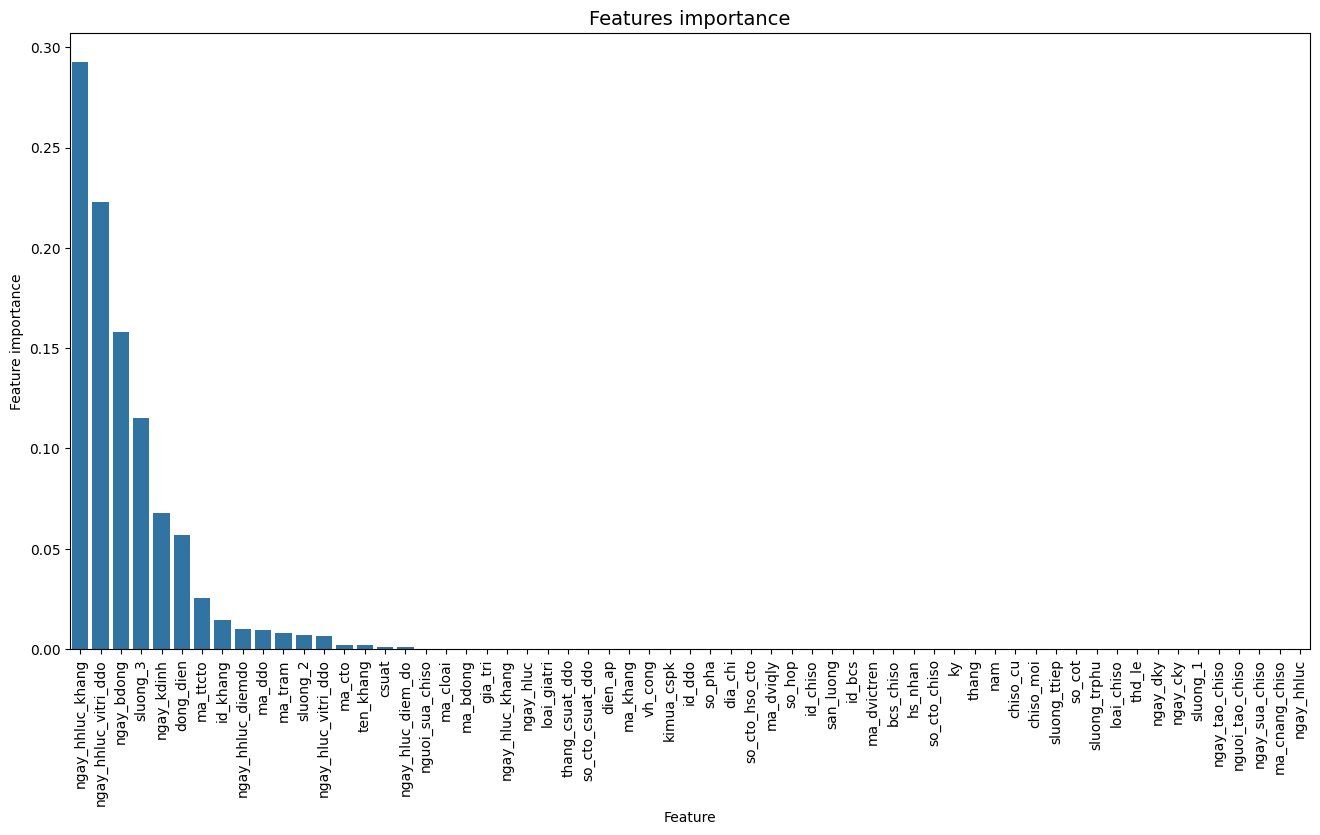

In [16]:
tmp = pd.DataFrame({'Feature': Features, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()